In [ ]:
# User Story 2 As a Logistics Manager, I wish to get a ABC Classification analisys 
#    in order to make decision on the sku position within the warehouses.

# Acceptance criteria 1: ABC Classification based on "Sales Forecast"
# Acceptance criteria 2 : A (60%) - B (30%) - C (10%)
# Acceptance criteria 3 : Please create a Pivot table to display how many units of inventory of A-B-C we are currently holding.


In [24]:
#  To get the dat from our file

import pandas as pd

# Read excel file with sheet name
dict_df = pd.read_excel('test.xlsx', 
                   sheet_name=['Starting Inventory','Planned Reception','Sales Forecast'])

# Get DataFrame from Dict
Sales_Forecast_df = dict_df.get('Sales Forecast')

# Print DataFrame's
print(Sales_Forecast_df)


          Week     SKU  Qty
0   2022-09-19  278302 -105
1   2022-09-26  278302 -105
2   2022-10-03  278302 -107
3   2022-10-10  278302 -107
4   2022-10-17  278302 -107
..         ...     ...  ...
219 2023-03-27  777126   -4
220 2023-04-03  777126   -5
221 2023-04-10  777126   -5
222 2023-04-17  777126   -5
223 2023-04-24  777126   -5

[224 rows x 3 columns]


In [25]:
# To convirte the quantity to a positive value we get the column Qty_abs 
Sales_Forecast_df['Qty_abs'] = Sales_Forecast_df['Qty'].abs()
print(Sales_Forecast_df)

          Week     SKU  Qty  Qty_abs
0   2022-09-19  278302 -105      105
1   2022-09-26  278302 -105      105
2   2022-10-03  278302 -107      107
3   2022-10-10  278302 -107      107
4   2022-10-17  278302 -107      107
..         ...     ...  ...      ...
219 2023-03-27  777126   -4        4
220 2023-04-03  777126   -5        5
221 2023-04-10  777126   -5        5
222 2023-04-17  777126   -5        5
223 2023-04-24  777126   -5        5

[224 rows x 4 columns]


In [26]:
# Some information about the type of our columns 
Sales_Forecast_df.info()
# We see that we have 224 ligne and 4 columns ther is no missing value and the type of columns datetime and integr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Week     224 non-null    datetime64[ns]
 1   SKU      224 non-null    int64         
 2   Qty      224 non-null    int64         
 3   Qty_abs  224 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.1 KB


In [27]:
# We change the name of our dataframe 
df = Sales_Forecast_df

In [28]:
print("We have : ","{:,} lines for {:,} SKUs".format(len(df), df.SKU.nunique()))

We have :  224 lines for 7 SKUs


In [47]:
#Pareto Analysis

# Sum the Qty picked per SKU 
df_par = pd.DataFrame(df.groupby(['SKU'])['Qty_abs'].sum())
df_par.columns = ['Qty_abs']

# Sort the data frame by descending
df_par.sort_values(['Qty_abs'], ascending = False, inplace = True)
df_par.reset_index(inplace = True)

# Cumulative Sum of Qty
df_par['CumSum'] = df_par['Qty_abs'].cumsum()

# % CumSum
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['Qty_abs'].sum())

# Calculate the cumulative number of SKU and the % SKU
df_par['%SKU'] = (100 * (df_par.index + 1).astype(float)/(df_par.index.max() + 1))

# > 80% Volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

# 10% SKU
df_sku5 = df_par[df_par['%SKU'] > 10].copy()
perc_sku5 = df_sku5['%SKU'].min()
perc_sum5 = df_sku5['%CumSum'].min()

print("Pareto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.head(7)

Pareto Analysis for 7 unique SKU


,SKU,Qty_abs,CumSum,%CumSum,%SKU
0,278302,2803,2803,42.722146,14.285714
1,684023,1594,4397,67.017223,28.571429
2,189672,1126,5523,84.179241,42.857143
3,169306,427,5950,90.687395,57.142857
4,115222,290,6240,95.107453,71.428571
5,795058,206,6446,98.247218,85.714286
6,777126,115,6561,100.000000,100.000000


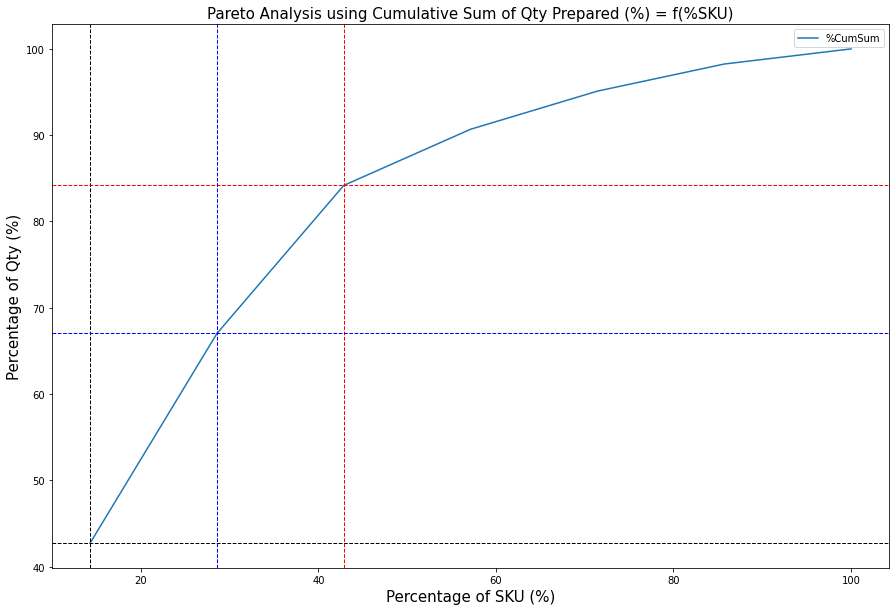

In [69]:
import matplotlib.pyplot as plt

# Visualization

ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (15,10))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Qty (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Qty Prepared (%) = f(%SKU)', fontsize = 15)

# Add Markers for 80/20

#Marker 1: x = 20% of Qty (blue)
#Marker 2: y = 80% of Boxes (red)

# 5% SKU
ax.axhline(perc_sum5 , color="black", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku5, color="black", linestyle="--", linewidth = 1.0)

# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)

# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)
plt.show()

In [ ]:
# Acceptance criteria 1: ABC Classification based on "Sales Forecast"

# Insights
# We can see that the threshold of 84% volume is reached with 43% of SKU
# we use these insights to increase our picking productivity
# by making a representation of the Pareto to link each SKU with its picking location
# then reduce the average distance during picking by grouping very high rotations
#      in a specific zone that is closed to the docks
# we can make the ABC Classification analisys for each week to have an up-to-date classification 

# Acceptance criteria 2 : A (60%) - B (30%) - C (10%)

# We see that the SKU 278302 constitutes 60% of volume 
# We see that the SKU 684023 and the SKU 189672 constitutes 30% of volume 
# We see that the SKU 169306 115222 795058 777126 constitutes 10% of volume 


In [ ]:
#  Acceptance criteria 3 : Please create a Pivot table to display how many units of inventory of A-B-C 
#  we are currently holding.

In [52]:
# Get DataFrame from Dict
Starting_Inventory_df = dict_df.get('Starting Inventory')
# Print DataFrame's
print(Starting_Inventory_df)

        Week     SKU   Qty
0 2022-09-12  278302  2618
1 2022-09-12  189672   292
2 2022-09-12  115222   163
3 2022-09-12  684023  1466
4 2022-09-12  795058     0
5 2022-09-12  169306   266
6 2022-09-12  777126     0


In [58]:
# Fonction to link the SKU with the Class
def f(row):
    if row['%CumSum'] < 60:
         return "A"
    elif row['%CumSum'] > 90:
         return "C"
    else:
         return "B"
    return val
df_par['Class'] = df_par.apply(f, axis=1)
print(df_par)

      SKU  Qty_abs  CumSum     %CumSum        %SKU Class
0  278302     2803    2803   42.722146   14.285714     A
1  684023     1594    4397   67.017223   28.571429     B
2  189672     1126    5523   84.179241   42.857143     B
3  169306      427    5950   90.687395   57.142857     C
4  115222      290    6240   95.107453   71.428571     C
5  795058      206    6446   98.247218   85.714286     C
6  777126      115    6561  100.000000  100.000000     C


In [61]:
# A dataframe of Class 
df_Class = df_par.drop(columns=['Qty_abs', 'CumSum','%CumSum','%SKU'])
print(df_Class)

      SKU Class
0  278302     A
1  684023     B
2  189672     B
3  169306     C
4  115222     C
5  795058     C
6  777126     C


In [62]:
# A dataframe of Class and The Qty on hand
df_merge = pd.merge(Starting_Inventory_df,df_Class,on = 'SKU', how='left')
print(df_merge)

        Week     SKU   Qty Class
0 2022-09-12  278302  2618     A
1 2022-09-12  189672   292     B
2 2022-09-12  115222   163     C
3 2022-09-12  684023  1466     B
4 2022-09-12  795058     0     C
5 2022-09-12  169306   266     C
6 2022-09-12  777126     0     C


In [67]:
# Pivot table to display how many units of inventory of A-B-C we are currently holding
df_Class_Holding = pd.DataFrame(df_merge.groupby(['Class'])['Qty'].sum())
print(df_Class_Holding)

        Qty
Class      
A      2618
B      1758
C       429


In [ ]:
# We Hold 2618 pcs of Class A, 1758 of Class B and 429 of Class C